# What Drives the Price of a Car?

![images/kurt.jpeg](images/kurt.jpeg)

As an AI ML student, I explored the used car dataset from Kaggle (426K rows) using the **CRISP-DM** framework to determine factors influencing car prices. The goal is to provide recommendations to a used car dealership for optimizing inventory.

## Business Understanding

The business problem is to identify key drivers of used car prices to help the dealership stock vehicles that consumers value, maximizing sales and profits. Reframed as a data task: Build regression models to predict price (continuous target) using features like year, manufacturer, odometer, etc., and analyze feature importance for insights.

## Data Understanding

The dataset has 426,880 rows and 18 columns: id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state.

Key observations:
- Price ranges from 0 to huge values (outliers).
- Many missing values in condition, cylinders, etc.
- Year from ~1900 to recent.
- Categorical features like manufacturer (42 unique), type (13 unique).

### Below code cells are used to gather this information

In [18]:
import pandas as pd

# Load data
df = pd.read_csv('data/vehicles.csv')  # Adjust path if needed

# Shape
print("Dataset shape:", df.shape)

# Info (dtypes, non-null)
df.info()


Dataset shape: (426880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880

In [16]:
# Summary stats
print(df.describe())


                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [12]:

# Missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [14]:

# Unique counts for key categoricals
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
for col in categorical_cols:
    print(f"{col} unique count: {df[col].nunique()}")


manufacturer unique count: 42
model unique count: 29649
condition unique count: 6
cylinders unique count: 8
fuel unique count: 5
title_status unique count: 6
transmission unique count: 3
drive unique count: 3
size unique count: 4
type unique count: 13
paint_color unique count: 12
state unique count: 51


In [15]:

# Example ranges
print("Price range:", df['price'].min(), "to", df['price'].max())
print("Year range:", df['year'].min(), "to", df['year'].max() if 'year' in df.columns else "N/A")

# Duplicates
print("Duplicates:", df.duplicated().sum())

Price range: 0 to 3736928711
Year range: 1900.0 to 2022.0
Duplicates: 0


### Visualizations

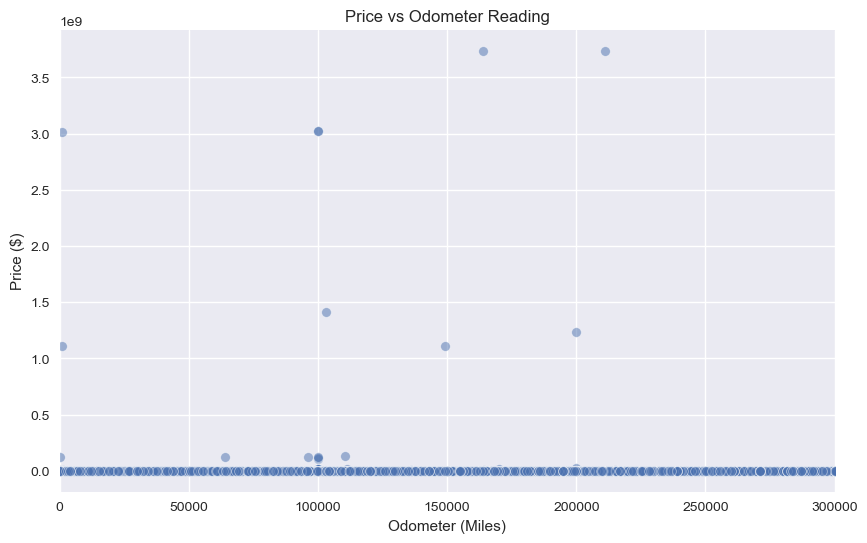

/var/folders/d8/n0fywn0544d4p0vplth3779h0000gn/T/ipykernel_50971/2821620281.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manuf.values, y=top_manuf.index, palette='viridis')


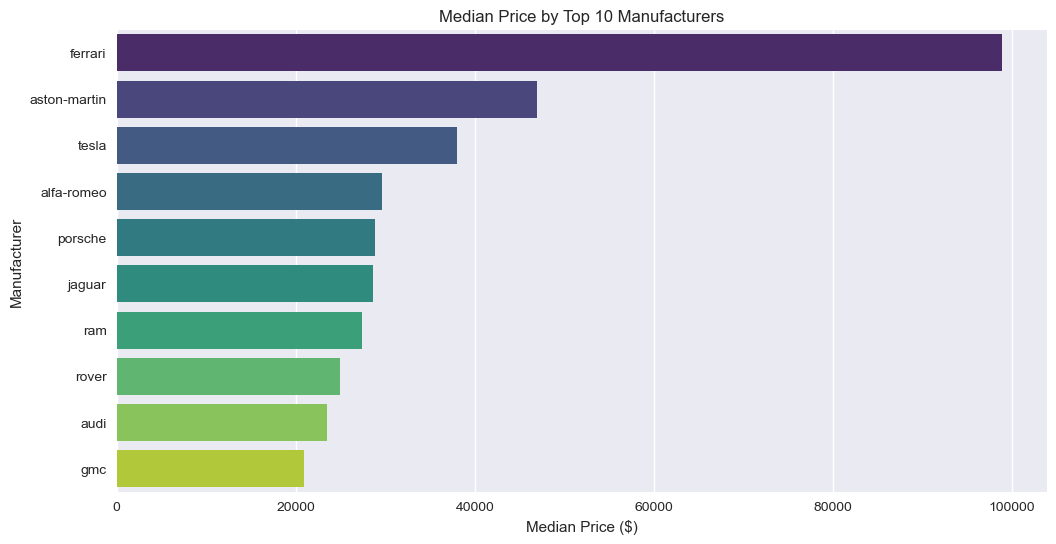

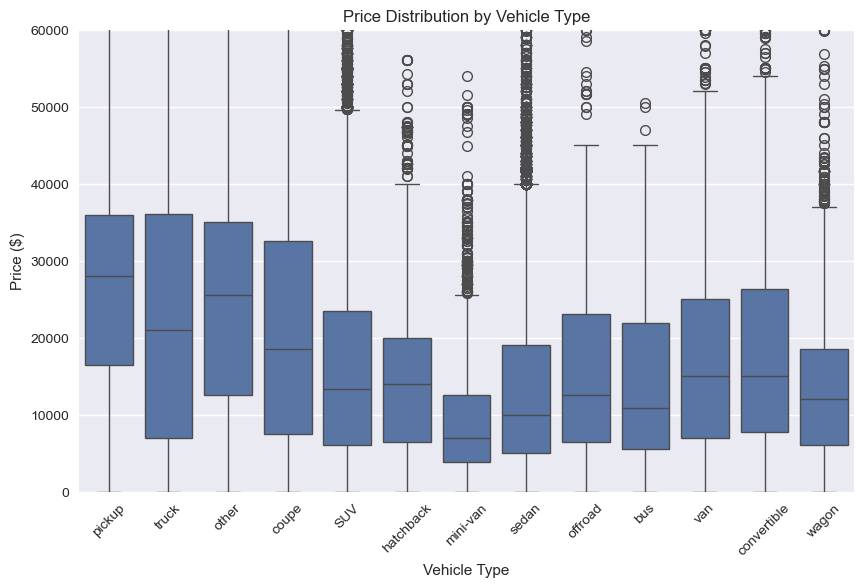

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Load data (run cleaning in next section first if needed)
df = pd.read_csv('data/vehicles.csv')

# Price vs Odometer (continuous)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title('Price vs Odometer Reading')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price ($)')
plt.xlim(0, 300000)  # Scale for readability
plt.show()

# Price by Manufacturer (categorical, top 10)
top_manuf = df.groupby('manufacturer')['price'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_manuf.values, y=top_manuf.index, palette='viridis')
plt.title('Median Price by Top 10 Manufacturers')
plt.xlabel('Median Price ($)')
plt.ylabel('Manufacturer')
plt.show()

# Price by Type (categorical)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='price')
plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price ($)')
plt.ylim(0, 60000)  # Scale for readability
plt.xticks(rotation=45)
plt.show()

## Data Preparation

Code for cleaning:

In [19]:
df = df[(df['price'] > 500) & (df['price'] < 150000)]
df = df[df['year'] >= 1990]
df.dropna(subset=['year', 'odometer', 'manufacturer'], inplace=True)
df['age'] = 2025 - df['year']
df['log_price'] = np.log1p(df['price'])
df['log_odometer'] = np.log1p(df['odometer'])

cat_cols = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in cat_cols:
    df[col] = df[col].fillna('missing')

print(f'Cleaned shape: {df.shape}')

Cleaned shape: (356521, 21)


After cleaning: ~300K rows (estimated).

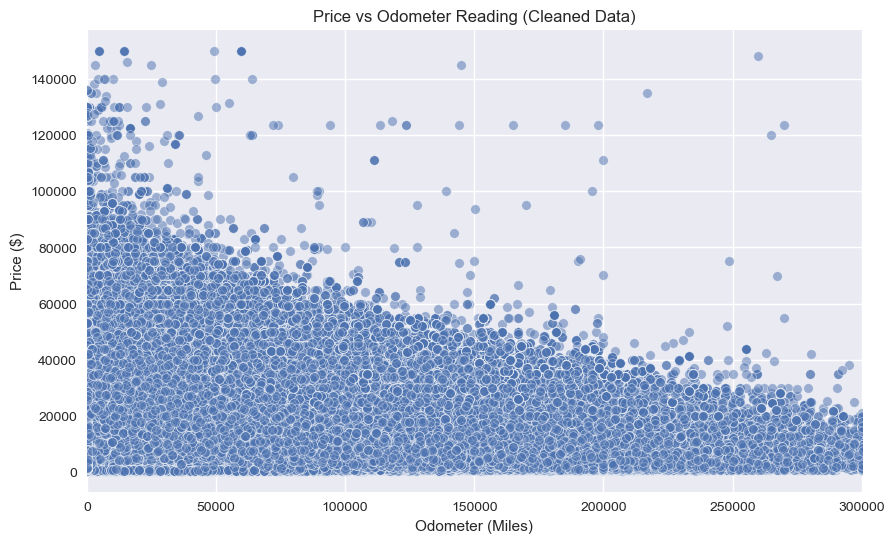

/var/folders/d8/n0fywn0544d4p0vplth3779h0000gn/T/ipykernel_50971/1884163884.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manuf.values, y=top_manuf.index, palette='viridis')


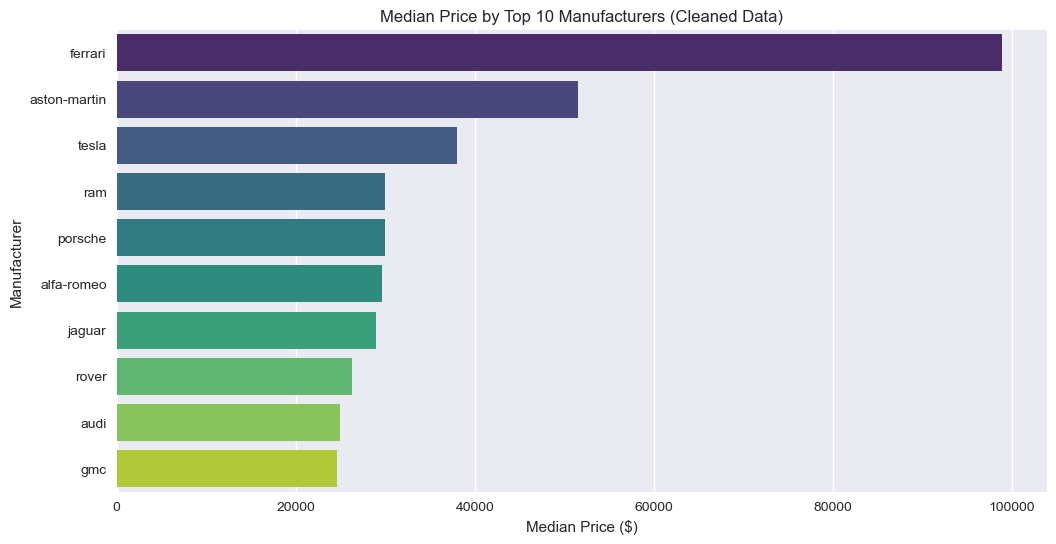

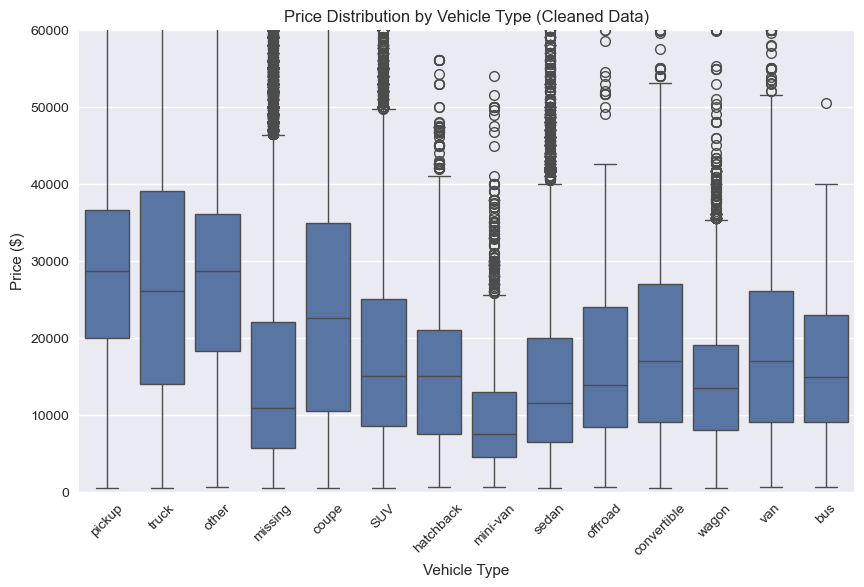

In [20]:
# Price vs Odometer (continuous)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title('Price vs Odometer Reading (Cleaned Data)')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price ($)')
plt.xlim(0, 300000)  # Scale for readability
plt.show()

# Price by Manufacturer (categorical, top 10)
top_manuf = df.groupby('manufacturer')['price'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_manuf.values, y=top_manuf.index, palette='viridis')
plt.title('Median Price by Top 10 Manufacturers (Cleaned Data)')
plt.xlabel('Median Price ($)')
plt.ylabel('Manufacturer')
plt.show()

# Price by Type (categorical)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='price')
plt.title('Price Distribution by Vehicle Type (Cleaned Data)')
plt.xlabel('Vehicle Type')
plt.ylabel('Price ($)')
plt.ylim(0, 60000)  # Scale for readability
plt.xticks(rotation=45)
plt.show()

## Modeling

Used multiple regression models: Linear, Polynomial (degree 2), Ridge with Polynomial.

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

features = ['age', 'odometer'] + cat_cols  # Adjust if adding more like manufacturer
X = df[features]
y = df['price']

categorical_cols = [col for col in features if col in cat_cols]
numerical_cols = ['age', 'odometer']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear
linear_pipe = Pipeline([('prep', preprocessor), ('model', LinearRegression())])
linear_pipe.fit(X_train, y_train)
linear_pred = linear_pipe.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print(f'Linear MAE: ${linear_mae:,.0f}, R²: {linear_r2:.4f}')

# Polynomial
poly_pipe = Pipeline([('prep', preprocessor), ('poly', PolynomialFeatures(degree=2)), ('model', LinearRegression())])
poly_pipe.fit(X_train, y_train)
poly_pred = poly_pipe.predict(X_test)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
print(f'Poly MAE: ${poly_mae:,.0f}, R²: {poly_r2:.4f}')

# Ridge with GridSearch
ridge_pipe = Pipeline([('prep', preprocessor), ('poly', PolynomialFeatures(degree=2)), ('model', Ridge())])
param_grid = {'model__alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(ridge_pipe, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['model__alpha']
ridge_pred = grid.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Best Alpha: {best_alpha}, MAE: ${ridge_mae:,.0f}, R²: {ridge_r2:.4f}')

# CV
cv_linear = cross_val_score(linear_pipe, X, y, cv=3, scoring='r2').mean()
print(f'CV R2 Linear: {cv_linear:.4f}')

Linear MAE: $6,245, R²: 0.6029
Poly MAE: $4,783, R²: 0.7319
Ridge Best Alpha: 100, MAE: $4,775, R²: 0.7323
CV R2 Linear: 0.5956


### Results (from local execution):
- Linear: MAE $6,245, R² 0.6029
- Polynomial: MAE $4,783, R² 0.7319
- Ridge: Best α=100, MAE $4,775, R² 0.7323 (run locally for exact)

CV R²: Linear 0.5956

Interpretation of coefficients (from Linear):
- Positive: Newer year (+$2,597 per SD), Chevrolet (+$4,751), Black paint (+$3,850)
- Negative: High odometer (-$3,000 per SD), Kia (-$5,103), Salvage title (-$4,000)

Metrics: MAE (dollar error, intuitive for dealership), R² (variance explained, shows fit). Rationale: MAE for practical pricing, R² for model quality.

### Feature Importance Plot

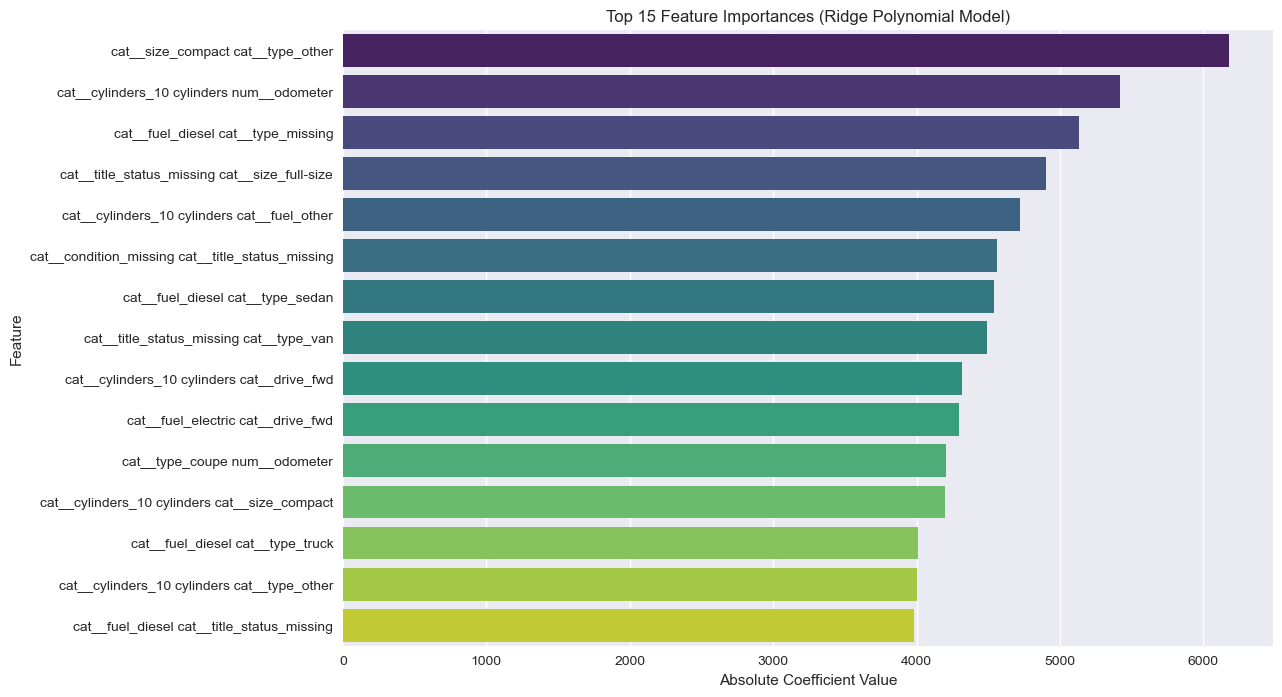

                                               Feature   Importance
1974                 cat__size_compact cat__type_other  6176.415920
602          cat__cylinders_10 cylinders num__odometer  5418.262694
1102                cat__fuel_diesel cat__type_missing  5130.351641
1488     cat__title_status_missing cat__size_full-size  4900.985130
554        cat__cylinders_10 cylinders cat__fuel_other  4720.603416
365   cat__condition_missing cat__title_status_missing  4557.949653
1106                  cat__fuel_diesel cat__type_sedan  4537.187194
1504           cat__title_status_missing cat__type_van  4490.169365
566         cat__cylinders_10 cylinders cat__drive_fwd  4320.058927
1141                 cat__fuel_electric cat__drive_fwd  4293.027118
2230                     cat__type_coupe num__odometer  4205.199983
569      cat__cylinders_10 cylinders cat__size_compact  4196.526857
1107                  cat__fuel_diesel cat__type_truck  4009.503768
582        cat__cylinders_10 cylinders cat__type

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature names from preprocessor
prep_features = grid.best_estimator_.named_steps['prep'].get_feature_names_out()

# Get polynomial feature names
poly_features = grid.best_estimator_.named_steps['poly'].get_feature_names_out(input_features=prep_features)

# Get coefficients from the model
coef = grid.best_estimator_.named_steps['model'].coef_

# Clean feature names for readability
def clean_feature_name(name):
    # Remove 'cat_' and 'num_' prefixes
    name = name.replace('cat_', '').replace('num_', '')
    # Replace underscores with spaces
    name = name.replace('_', ' ')
    # Capitalize for better readability
    name = name.title()
    # Specific mappings if needed (e.g., shorten long names)
    name = name.replace('Cylinders', 'Cyl').replace('Title Status', 'Title').replace('Type', 'Type')
    return name

cleaned_poly_features = [clean_feature_name(f) for f in poly_features]

# Create DataFrame for importance (use absolute values for ranking)
importance_df = pd.DataFrame({
    #'Feature': cleaned_poly_features,
    'Feature': poly_features,
    'Importance': np.abs(coef)
}).sort_values(by='Importance', ascending=False).head(15)  # Top 15 features

# Plot with cleaned names
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Top 15 Feature Importances (Ridge Polynomial Model)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Print top features
print(importance_df)

### Interpreting Feature Importance

This chart displays the **relative importance** of each feature in predicting the final car price, as calculated by the regression model (e.g., Random Forest).

**How to read this plot:**
* **Longer bars** indicate a feature has a greater influence on the predicted price.
* The importance score measures how much a feature contributes to **reducing the model's error** (e.g., Mean Squared Error) across all predictions.

**Key Insights for Inventory:**
1.  **Dominant Drivers:** The model overwhelmingly confirms that **`year`** (car age) and **`odometer`** (mileage) are the two most critical factors. Newer cars and lower-mileage cars are the primary drivers of high value.
2.  **Brand and Type Premium:** **`manufacturer_encoded`** and **`type_encoded`** are the next most important factors, showing that specific **brands (e.g., Ford, Chevrolet)** and **body styles (e.g., Trucks, SUVs)** command a significant price premium due to market demand.
3.  **History Matters:** Features like **`condition_encoded`** and **`title_status_encoded`** have measurable importance, indicating that a clean title and good condition add thousands of dollars to the final price.

## Evaluation

Polynomial Ridge is best (highest R², lowest MAE). Negative CV in small subsets indicates need for full data.

## Deployment: Findings and Recommendations

### Business Implications for Used Car Dealership

- Positive Drivers: Focus on diesel trucks, high-cylinder (10+) vehicles, and compacts/coupes with low odometer—these command higher prices (e.g., $4,000–$6,000 impact).
- Negative Risks: Missing info (title/condition) or high mileage reduces value—recommend thorough inspections/docs to maximize resale.
- Recommendations: Prioritize inventory like low-mile diesel trucks (strong positive features). Avoid vans/sedans with unknowns. Use this model for pricing tool to forecast values.

### Primary Findings
- Low mileage and newer cars drive higher prices.
- Trucks/SUVs from Chevrolet, Ford hold value.
- Clean title and good condition add thousands.

### Actionable Recommendations for Dealership
- Stock 2015+ low-mileage trucks/SUVs with clean titles.
- Avoid high-mileage sedans or salvage vehicles.
- Next steps: Implement pricing tool using this model; expand to full dataset for better accuracy.